In [1]:
from IPython.display import Image

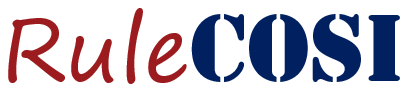

In [2]:
Image(filename='rc-logo.png')

# Demo of the combination and simplification algorithm

In [3]:
import pandas as pd

## For using the library, just import the _RuleCOSIClassifier_ class from **rulecosi** package

In [4]:
from rulecosi import RuleCOSIClassifier

ModuleNotFoundError: No module named 'gmpy2'

The algorithm works with several type of tree ensembles and it uses the **sklearn** implementations.
- Bagging Trees
- RandomForests
- Gradient Boosting Trees (original implementation)
- XGBoost
- Light GBM
- CatBoost

In [5]:
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

### Load a sample dataset and split the data

We use the Wisconsin diagnostic breast cancer dataset. There are two classes, malignant (0) and benign (1).

In [6]:
# data = pd.read_csv('data/wisconsin.csv')
# data = pd.read_csv('data/training2.csv')
data = pd.read_csv('data/汇总 - final__.csv')
# data = pd.read_csv('data/泥质和沙质.csv')
data = data.dropna()
print(data)
# data = pd.read_csv('data/泥质和沙质.csv')

          AWEI     B11  B11-B2  B11-B3  B11-B4  B11-B5  B11-B6  B11-B7  \
0      4554.75   168.0  -834.0 -1302.0 -1642.0 -1557.0  -834.0  -755.0   
1      4436.50   170.0  -822.0 -1280.0 -1588.0 -1678.0  -986.0  -944.0   
2      4322.50   157.0  -798.0 -1283.0 -1685.0 -1839.0 -1506.0 -1456.0   
3      4533.75   170.0  -827.0 -1278.0 -1372.0 -1189.0  -464.0  -385.0   
4      4242.25   167.0  -837.0 -1213.0 -1251.0 -1371.0  -594.0  -553.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
11859 -3982.25  1275.0   611.0   347.0   313.0    22.0     3.0   -66.0   
11860 -3938.75  1273.0   545.0   319.0   285.0    -1.0    -2.0   -57.0   
11861 -1599.50   920.0   134.0   -86.0  -216.0  -432.0  -432.0  -497.0   
11862   872.00   455.0  -256.0  -483.0  -621.0  -799.0  -692.0  -778.0   
11863  -138.75   598.0   -26.0  -309.0  -346.0  -608.0  -594.0  -675.0   

       B11-B8  B11-B8A  ...         VV     VV/VH     VV_VH  VV_contrast  \
0      -674.0   -380.0  ... -11.4673

In [7]:
nan_values = data.isnull()
# print(nan_values)
# 使用 any() 方法查找每一列是否存在 True 值（即含有 NaN 值）
nan_columns = nan_values.columns[nan_values.any()]

# 输出含有 NaN 值的列名
print("含有 NaN 值的列名：", nan_columns)
# 使用 any(axis=1) 方法查找每一行是否存在 True 值（即含有 NaN 值）
nan_rows = data[nan_values.any(axis=1)]

# 输出含有 NaN 值的行
print("含有 NaN 值的行：")
print(nan_rows)

含有 NaN 值的列名： Index([], dtype='object')
含有 NaN 值的行：
Empty DataFrame
Columns: [AWEI, B11, B11-B2, B11-B3, B11-B4, B11-B5, B11-B6, B11-B7, B11-B8, B11-B8A, B11/B12, B11/B2, B11/B3, B11/B4, B11/B5, B11/B6, B11/B7, B11/B8, B11/B8A, B11_B12, B11_contrast, B11_corr, B11_lap, B11_plus_B12, B11_var, B12, B12-B11, B12-B2, B12-B3, B12-B4, B12-B5, B12-B6, B12-B7, B12-B8, B12-B8A, B12/B11, B12/B2, B12/B3, B12/B4, B12/B5, B12/B6, B12/B7, B12/B8, B12/B8A, B12_contrast, B12_corr, B12_lap, B12_var, B2, B2/B11, B2/B12, B2/B3, B2/B4, B2/B5, B2/B6, B2/B7, B2/B8, B2/B8A, B2_B11, B2_B12, B2_B3, B2_B4, B2_B5, B2_B6, B2_B7, B2_B8, B2_B8A, B2_contrast, B2_corr, B2_lap, B2_plus_B11, B2_plus_B12, B2_plus_B3, B2_plus_B4, B2_plus_B5, B2_plus_B6, B2_plus_B7, B2_plus_B8, B2_plus_B8A, B2_var, B3, B3-B2, B3/B11, B3/B12, B3/B2, B3/B4, B3/B5, B3/B6, B3/B7, B3/B8, B3/B8A, B3_B11, B3_B12, B3_B4, B3_B5, B3_B6, B3_B7, B3_B8, B3_B8A, B3_contrast, ...]
Index: []

[0 rows x 318 columns]


In [8]:
import numpy as np
# 筛选出'type'为0的样本点
type_0_samples = data[data['type'] == 0]

# 计算要抽取的样本数量（一半）
sample_count = int(len(type_0_samples) // 1)

# 随机抽取样本点
type_0_samples = type_0_samples.sample(n=sample_count, random_state=42)

# 打印抽取的样本点数量
print("抽取的样本点数量：", len(type_0_samples))

# 筛选出'type'为1的样本点
type_1_samples = data[data['type'] == 1]

# 将抽取的type为0的样本点和type为1的样本点合并
merged_data = pd.concat([type_0_samples, type_1_samples], ignore_index=True)

# np.set_printoptions(threshold=np.inf)
# 打印合并后的数据集信息
print("合并后的数据集信息：")
# print(merged_data['type'].values)
print(merged_data['type'].value_counts())

抽取的样本点数量： 6067
合并后的数据集信息：
type
0    6067
1    5795
Name: count, dtype: int64


In [9]:
data = merged_data
data.head()

,AWEI,B11,B11-B2,B11-B3,B11-B4,B11-B5,B11-B6,B11-B7,B11-B8,B11-B8A,...,VV,VV/VH,VV_VH,VV_contrast,VV_corr,VV_lap,VV_var,elevation,slope,type
0,4120.25,30.0,-806.0,-1056.0,-754.0,-538.0,-120.0,-131.0,-110.0,-62.0,...,-15.594664,0.583397,-0.263107,1.245227,0.412326,8.113472,1.061254,0.0,0.000000,0
1,5213.25,29.0,-890.0,-1411.0,-1933.0,-2127.0,-1555.0,-1627.0,-1419.0,-1197.0,...,-13.079967,0.459640,-0.370201,0.387273,0.220583,0.118304,0.248481,-7.0,5.026712,0
2,-9782.25,2069.0,1438.5,1292.0,1261.0,1022.0,770.0,635.5,464.0,429.0,...,-5.346346,0.366583,-0.463504,0.639318,0.388296,-3.135206,0.521978,2.0,1.395588,0
3,5915.00,46.0,-1068.0,-1650.0,-2456.0,-2668.0,-2387.0,-2506.0,-2298.0,-2335.0,...,-12.178343,0.459620,-0.370220,0.354091,0.661894,-1.718387,0.526692,1.0,1.495207,0
4,2516.25,85.0,-317.0,-693.0,-647.0,-750.0,-308.0,-321.0,-311.0,-159.0,...,-11.002781,0.505035,-0.328872,2.662500,0.373167,-1.713012,2.133766,0.0,0.000000,0


In [10]:
X = data.drop(['type'], axis=1)#[['elevation', 'slope']]
y = data['type']
# 使用 concat 函数将 X 和 y 沿列方向合并
combined_data = pd.concat([X, y], axis=1)
print(combined_data)
print(len(y))
# 统计 y 列中 0 和 1 的数量
count_0 = y.value_counts()[0]
count_1 = y.value_counts()[1]

print("0 的数量为:", count_0)
print("1 的数量为:", count_1)

          AWEI     B11  B11-B2  B11-B3  B11-B4  B11-B5  B11-B6  B11-B7  \
0      4120.25    30.0  -806.0 -1056.0  -754.0  -538.0  -120.0  -131.0   
1      5213.25    29.0  -890.0 -1411.0 -1933.0 -2127.0 -1555.0 -1627.0   
2     -9782.25  2069.0  1438.5  1292.0  1261.0  1022.0   770.0   635.5   
3      5915.00    46.0 -1068.0 -1650.0 -2456.0 -2668.0 -2387.0 -2506.0   
4      2516.25    85.0  -317.0  -693.0  -647.0  -750.0  -308.0  -321.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
11857 -3982.25  1275.0   611.0   347.0   313.0    22.0     3.0   -66.0   
11858 -3938.75  1273.0   545.0   319.0   285.0    -1.0    -2.0   -57.0   
11859 -1599.50   920.0   134.0   -86.0  -216.0  -432.0  -432.0  -497.0   
11860   872.00   455.0  -256.0  -483.0  -621.0  -799.0  -692.0  -778.0   
11861  -138.75   598.0   -26.0  -309.0  -346.0  -608.0  -594.0  -675.0   

       B11-B8  B11-B8A  ...         VV     VV/VH     VV_VH  VV_contrast  \
0      -110.0    -62.0  ... -15.5946

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1212)
print(X_train)
# print(X_train.shape[0])

           AWEI     B11  B11-B2  B11-B3  B11-B4  B11-B5  B11-B6  B11-B7  \
5639  -8290.750  1983.0  1256.0   984.0   427.0    94.0    21.0  -112.0   
7552    389.000   672.0  -111.0  -362.0  -338.0  -412.0  -402.0  -451.0   
6092    850.750   587.0  -303.0  -623.0  -835.0  -928.0  -853.0  -913.0   
10578   368.250   436.0  -268.0  -356.0  -328.0  -405.0  -408.0  -416.0   
5204   1633.000    61.0  -346.0  -447.0  -183.0  -146.0   -98.0  -101.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
1125  -4787.125  1668.0   441.0   340.0   522.0   217.0  -829.5 -1280.0   
2626  -3139.500   948.0   529.0   336.0   549.0    60.0 -1084.0 -1352.0   
7606  -2223.250  1108.0    92.0   -68.0  -114.0  -221.0  -205.0  -214.0   
1690   1837.750   283.0  -459.0  -721.0  -975.0 -1165.0 -1128.0 -1186.0   
9352   -687.500   472.0    80.0   -92.0  -250.0  -372.0  -370.0  -408.0   

       B11-B8  B11-B8A  ...     VH_var         VV     VV/VH     VV_VH  \
5639   -333.0   -204.0  ..

### Simplifying an XGBoost classifier

We create a XGBClassifier instance. The ensemble can be fitted, or it can be just instantiated and RuleCOSI will fit the ensemble first and then simplify it.

In [12]:
# ens = XGBClassifier(random_state=1212)

# feature_names = X_train.columns[:]
ens= RandomForestClassifier(random_state=1212)

This is done by instanciating a **RuleCOSIClassifier** class with the desired parameters, _n\_estimator_, _tree\_max\_depth_, _conf\_threshold_ and _min\_samples_.

In [13]:
rc = RuleCOSIClassifier(base_ensemble=ens,  
                        # metric='roc_auc',n_estimators=150, tree_max_depth=5,  # metric = 'roc_auc','accuracy','f1'
                        # conf_threshold=0.75, cov_threshold=0.003,    
                        metric='f1',n_estimators=150, tree_max_depth=7,  # metric = 'roc_auc','accuracy','f1'
                        conf_threshold=0.75, cov_threshold=0.002,  
                        # metric='f1',n_estimators=150, tree_max_depth=5,  # metric = 'roc_auc','accuracy','f1'
                        # conf_threshold=0.75, cov_threshold=0.002,    # 规则1最少 
                        # metric='f1',n_estimators=150, tree_max_depth=5,  # metric = 'roc_auc','accuracy','f1'
                        # conf_threshold=0.75, cov_threshold=0.01,    # 
                        # conf_threshold:组合规则的置信度或规则准确性阈值, 值越大，丢弃的规则越多，默认值为 0.5
                        # cov_threshold :组合规则的覆盖阈值，值越大，丢弃的规则越多，默认值为 0.0，它仅丢弃具有空覆盖率的规则。
                        random_state=1212, column_names=X_train.columns)

In [14]:
%%time
rc.fit(X_train, y_train)
X_columns = X_train.columns[:]
# print(y_train)
# print(X_columns)
# print(X_train.values())

CPU times: total: 1min 3s
Wall time: 1min 3s


In [15]:
print(rc.original_rulesets_)

[r_1: (B4_B6 ≤ 0.047) ˄ (B7_contrast ≤ 551.587) ˄ (B4_B12 ≤ -0.035) ˄ (B4/B11 ≤ 0.562) → [0]
r_2: (B7_contrast ≤ 551.587) ˄ (B4/B11 > 0.562) ˄ (B4_B6 ≤ 0.047) ˄ (B11/B5 ≤ 1.147) ˄ (B4_B12 ≤ -0.035) → [0]
r_3: (B3_B12 ≤ -0.310) ˄ (B7_contrast ≤ 551.587) ˄ (B4/B11 > 0.562) ˄ (B4_B6 ≤ 0.047) ˄ (B11/B5 > 1.147) ˄ (B4_B12 ≤ -0.035) → [0]
r_4: (B3_B12 > -0.310) ˄ (B7_contrast ≤ 551.587) ˄ (B4/B11 > 0.562) ˄ (B4_B6 ≤ 0.047) ˄ (B11/B5 > 1.147) ˄ (B4_B12 ≤ -0.035) → [1]
r_5: (B7_B11 ≤ -0.128) ˄ (B7_contrast > 551.587) ˄ (B8A/B6 ≤ 1.061) ˄ (B4_B6 ≤ 0.047) ˄ (B4_B8 ≤ -0.099) ˄ (B8_contrast ≤ 9760.997) ˄ (B4_B12 ≤ -0.035) → [1]
r_6: (B7_B11 ≤ -0.128) ˄ (B7_contrast > 551.587) ˄ (B8A/B6 ≤ 1.061) ˄ (B4_B8 > -0.099) ˄ (B4_B6 ≤ 0.047) ˄ (B8_contrast ≤ 9760.997) ˄ (B4_B12 ≤ -0.035) → [0]
r_7: (B7_contrast > 551.587) ˄ (B8A/B6 ≤ 1.061) ˄ (B4_B6 ≤ 0.047) ˄ (B8_contrast ≤ 9760.997) ˄ (B4_B12 ≤ -0.035) ˄ (B7_B11 > -0.128) → [1]
r_8: (B5_lap ≤ 1034.500) ˄ (B7_contrast > 551.587) ˄ (B7_corr ≤ 0.906) ˄ (B4_B6

In [16]:
print(rc.combined_rules)
print(rc.rrrr)

r_1: (B8A_plus_B12 ≤ 4380.500) ˄ (B6_B11 > -0.126) ˄ (B11-B8 > -1458.500) ˄ (B5-B2 ≤ 1066.000) ˄ (VH ≤ -20.115) ˄ (B2/B7 ≤ 0.975) ˄ (B4_contrast ≤ 5474.203) ˄ (B4 > 668.000) ˄ (EEVI > 0.158) ˄ (B5_B6 ≤ 0.063) ˄ (B12/B11 ≤ 0.881) → [1]
r_2: (B5_B11 ≤ 0.006) ˄ (B8_var > 4311.905) ˄ (B8A-B7 > 103.500) → [0]
r_3: (B4_B6 > 0.166) ˄ (B4_var ≤ 33768.442) ˄ (B2_plus_B11 > 805.000) → [0]
r_4: (B8/B3 ≤ 0.232) ˄ (B11_var > 1.859) ˄ (VH_corr ≤ 0.391) → [0]
r_5: (B8A_plus_B12 ≤ 4380.500) ˄ (B8/B7 > 0.918) ˄ (B11-B8 > -1458.500) ˄ (VV_contrast ≤ 1.950) ˄ (B8A/B6 ≤ 1.135) ˄ (B4_B6 ≤ 0.040) ˄ (B5/B3 ≤ 1.514) ˄ (B11_B12 > 0.092) ˄ (B3_contrast ≤ 12834.056) ˄ (B2_plus_B3 > 2019.000) ˄ (B4/B8A > 0.836) → [1]
r_6: (elevation > 0.500) ˄ (B4_corr ≤ 0.843) ˄ (B5/B2 ≤ 1.655) ˄ (B7_contrast > 3148.816) → [0]
r_7: (B2_plus_B3 ≤ 1343.500) ˄ (B3/B11 ≤ 13.245) ˄ (SAR_Sum > -40.886) ˄ (B8A/B3 > 0.181) ˄ (B2_contrast ≤ 1247.080) ˄ (B3/B4 ≤ 1.383) ˄ (B8A/B12 > 2.054) ˄ (B8-B4 ≤ -189.000) → [1]
r_8: (B4/B12 > 8.972) ˄

## Examining the simplified rules

The rules will be stored in the _simplified\_ruleset_ \_ attribute of the RuleCOSI object. The function _print\_rules_ print the rules and its heuristics on the console. It can also return a string object or a pandas DataFrame object to be used for further analysis. Additionally, the decimal digits displayed on the heuristics values and the condition thresholds can be modified with the _heuristics\_digits_ and the _condition\_digits_ parameters.

In [17]:
rc.simplified_ruleset_.print_rules(heuristics_digits=4, condition_digits=1)

cov 	conf 	supp 	samples 		rule
0.2838	0.9962	0.2827	[9,2347]	r_1: (B11-B8 > -1458.5) ˄ (B12/B11 ≤ 0.9) ˄ (B2/B7 ≤ 1.0) ˄ (B4 > 668.0) ˄ (B4_contrast ≤ 5474.2) ˄ (B5-B2 ≤ 1066.0) ˄ (B5_B6 ≤ 0.1) ˄ (B6_B11 > -0.1) ˄ (B8A_plus_B12 ≤ 4380.5) ˄ (EEVI > 0.2) ˄ (VH ≤ -20.1) → [1]
0.0930	1.0000	0.0930	[772,0]		r_2: (B5_B11 ≤ 0.0) ˄ (B8A-B7 > 103.5) ˄ (B8_var > 4311.9) → [0]
0.0559	1.0000	0.0559	[464,0]		r_3: (B2_plus_B11 > 805.0) ˄ (B4-B3 ≤ -69.2) ˄ (B4_var ≤ 33768.4) ˄ (B5/B2 ≤ 1.1) → [0]
0.0501	1.0000	0.0501	[416,0]		r_4: (B11_var > 3.0) ˄ (B3_B8 > 0.6) ˄ (B3_var ≤ 2168.3) ˄ (VH_corr ≤ 0.4) → [0]
0.0356	1.0000	0.0356	[296,0]		r_5: (B2_plus_B11 > 816.5) ˄ (B3_corr ≤ 0.7) ˄ (B4/B12 > 9.0) ˄ (B4_plus_B11 > 1353.0) ˄ (B6/B4 ≤ 0.9) → [0]
0.0347	1.0000	0.0347	[288,0]		r_6: (B4_corr ≤ 0.8) ˄ (B5/B2 ≤ 1.7) ˄ (B7_contrast > 3148.8) ˄ (elevation > 0.5) → [0]
0.0328	0.9963	0.0326	[1,271]		r_7: (B2_contrast ≤ 1247.1) ˄ (B2_plus_B3 ≤ 1343.5) ˄ (B3/B11 ≤ 13.2) ˄ (B3/B4 ≤ 1.4) ˄ (B8-B4 ≤ -189.0) ˄ (B8A/B1

In [18]:
rc.simplified_ruleset_.print_rules(return_object='dataframe',heuristics_digits=4, condition_digits=1)

,cov,conf,supp,samples,#,A,y
0,0.2838,0.9962,0.2827,"[9,2347]",r_1,(B11-B8 > -1458.5) ˄ (B12/B11 ≤ 0.9) ˄ (B2/B7 ...,[1]
1,0.0930,1.0000,0.0930,"[772,0]",r_2,(B5_B11 ≤ 0.0) ˄ (B8A-B7 > 103.5) ˄ (B8_var > ...,[0]
2,0.0559,1.0000,0.0559,"[464,0]",r_3,(B2_plus_B11 > 805.0) ˄ (B4-B3 ≤ -69.2) ˄ (B4_...,[0]
3,0.0501,1.0000,0.0501,"[416,0]",r_4,(B11_var > 3.0) ˄ (B3_B8 > 0.6) ˄ (B3_var ≤ 21...,[0]
4,0.0356,1.0000,0.0356,"[296,0]",r_5,(B2_plus_B11 > 816.5) ˄ (B3_corr ≤ 0.7) ˄ (B4/...,[0]
5,0.0347,1.0000,0.0347,"[288,0]",r_6,(B4_corr ≤ 0.8) ˄ (B5/B2 ≤ 1.7) ˄ (B7_contrast...,[0]
6,0.0328,0.9963,0.0326,"[1,271]",r_7,(B2_contrast ≤ 1247.1) ˄ (B2_plus_B3 ≤ 1343.5)...,[1]
7,0.0290,0.9917,0.0288,"[2,239]",r_8,(B11-B4 > -1264.0) ˄ (B12/B11 ≤ 0.7) ˄ (B2_con...,[1]
8,0.0287,1.0000,0.0287,"[238,0]",r_9,(B2_plus_B11 > 805.0) ˄ (B4_B6 > 0.2) ˄ (B4_va...,[0]
9,0.0259,1.0000,0.0259,"[0,215]",r_10,(B11_var ≤ 3620.4) ˄ (B3_plus_B7 > 2164.5) ˄ (...,[1]


## Checking the classification performance of the simplified rule-based classifier

In [19]:
# this function is used for counting the number of rules extracted from the tree ensemble (original ruelesets)
def get_n_rules(rulesets):
    n_rules = 0
    for ruleset in rulesets:
        for rule in ruleset:
            n_rules += 1
    return n_rules

In [20]:
rc.simplified_ruleset_.print_rules()

cov 	conf 	supp 	samples 		rule
0.2838	0.9962	0.2827	[9,2347]	r_1: (B11-B8 > -1458.500) ˄ (B12/B11 ≤ 0.881) ˄ (B2/B7 ≤ 0.975) ˄ (B4 > 668.000) ˄ (B4_contrast ≤ 5474.203) ˄ (B5-B2 ≤ 1066.000) ˄ (B5_B6 ≤ 0.063) ˄ (B6_B11 > -0.126) ˄ (B8A_plus_B12 ≤ 4380.500) ˄ (EEVI > 0.158) ˄ (VH ≤ -20.115) → [1]
0.0930	1.0000	0.0930	[772,0]		r_2: (B5_B11 ≤ 0.006) ˄ (B8A-B7 > 103.500) ˄ (B8_var > 4311.905) → [0]
0.0559	1.0000	0.0559	[464,0]		r_3: (B2_plus_B11 > 805.000) ˄ (B4-B3 ≤ -69.250) ˄ (B4_var ≤ 33768.442) ˄ (B5/B2 ≤ 1.119) → [0]
0.0501	1.0000	0.0501	[416,0]		r_4: (B11_var > 2.950) ˄ (B3_B8 > 0.609) ˄ (B3_var ≤ 2168.321) ˄ (VH_corr ≤ 0.391) → [0]
0.0356	1.0000	0.0356	[296,0]		r_5: (B2_plus_B11 > 816.500) ˄ (B3_corr ≤ 0.706) ˄ (B4/B12 > 8.972) ˄ (B4_plus_B11 > 1353.000) ˄ (B6/B4 ≤ 0.917) → [0]
0.0347	1.0000	0.0347	[288,0]		r_6: (B4_corr ≤ 0.843) ˄ (B5/B2 ≤ 1.655) ˄ (B7_contrast > 3148.816) ˄ (elevation > 0.500) → [0]
0.0328	0.9963	0.0326	[1,271]		r_7: (B2_contrast ≤ 1247.080) ˄ (B2_plus_B3 ≤ 1343.5

In [21]:
print(f'== Original XGBoost ensemble ==')
print(f'Number of trees: {rc.base_ensemble_.n_estimators} trees')
print(f'Number of rules: {get_n_rules(rc.original_rulesets_)} rules\n')

print(f'== Simplified rules ==')
rc.simplified_ruleset_.print_rules()
# print('X_test',X_test)
y_pred = rc.predict(X_test)
print(y_pred)
# print(y_pred)
if isinstance(rc.base_ensemble, XGBClassifier):
# if isinstance(rc.base_ensemble, RandomForestClassifier):
    y_pred_ens = rc.base_ensemble_.predict(X_test, validate_features=False)
else:  
    y_pred_ens = rc.base_ensemble_.predict(X_test)
print("Combinations: {}".format(rc.n_combinations_))
print("Time: {}\n".format(rc.combination_time_))
print(f'====== Classification performance of XGBoost ======')
print(classification_report(y_test, y_pred_ens,digits=4))
print(f'\n====== Classification performance of simplified rules ======')
print(classification_report(y_test, y_pred,digits=4))
print('\n')
  
# cov：规则的覆盖样本数占总的规则的概率值；
# conf：此规则覆盖样本的概率 
# supp：覆盖样本数当中样本支持该规则占总的规则的概率值
# samples[样本分类为0，分类为1] ：描述样本数量

== Original XGBoost ensemble ==
Number of trees: 150 trees
Number of rules: 11587 rules

== Simplified rules ==
cov 	conf 	supp 	samples 		rule
0.2838	0.9962	0.2827	[9,2347]	r_1: (B11-B8 > -1458.500) ˄ (B12/B11 ≤ 0.881) ˄ (B2/B7 ≤ 0.975) ˄ (B4 > 668.000) ˄ (B4_contrast ≤ 5474.203) ˄ (B5-B2 ≤ 1066.000) ˄ (B5_B6 ≤ 0.063) ˄ (B6_B11 > -0.126) ˄ (B8A_plus_B12 ≤ 4380.500) ˄ (EEVI > 0.158) ˄ (VH ≤ -20.115) → [1]
0.0930	1.0000	0.0930	[772,0]		r_2: (B5_B11 ≤ 0.006) ˄ (B8A-B7 > 103.500) ˄ (B8_var > 4311.905) → [0]
0.0559	1.0000	0.0559	[464,0]		r_3: (B2_plus_B11 > 805.000) ˄ (B4-B3 ≤ -69.250) ˄ (B4_var ≤ 33768.442) ˄ (B5/B2 ≤ 1.119) → [0]
0.0501	1.0000	0.0501	[416,0]		r_4: (B11_var > 2.950) ˄ (B3_B8 > 0.609) ˄ (B3_var ≤ 2168.321) ˄ (VH_corr ≤ 0.391) → [0]
0.0356	1.0000	0.0356	[296,0]		r_5: (B2_plus_B11 > 816.500) ˄ (B3_corr ≤ 0.706) ˄ (B4/B12 > 8.972) ˄ (B4_plus_B11 > 1353.000) ˄ (B6/B4 ≤ 0.917) → [0]
0.0347	1.0000	0.0347	[288,0]		r_6: (B4_corr ≤ 0.843) ˄ (B5/B2 ≤ 1.655) ˄ (B7_contrast > 3148.816

D:\aconda3\envs\py38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [22]:
# data_other = pd.read_csv('D:/滩涂py/新建文件夹/汇总/黄河三角洲汇总.csv').dropna()  #0.62  0.81 0.72
# data_other = pd.read_csv('D:/滩涂py/新建文件夹/汇总/茅尾海汇总.csv').dropna() #0.98 0.98 0.98
# data_other = pd.read_csv('D:/滩涂py/新建文件夹/汇总/淇澳岛汇总.csv').dropna() #0.64 0.84 0.73
# data_other = pd.read_csv('D:/滩涂py/新建文件夹/汇总/深圳湾汇总.csv').dropna() #0.91 0.91 0.91
# data_other = pd.read_csv('D:/滩涂py/新建文件夹/汇总/盐城汇总.csv').dropna() #0.96 0.86 0.90
# data_other = pd.read_csv('D:/滩涂py/新建文件夹/汇总/渔寮滩汇总.csv').dropna() # 0.61 0.76 0.68
# data_other = pd.read_csv('D:/滩涂py/新建文件夹/汇总/漳江口汇总.csv').dropna() # 0.97 0.96 0.97
# data_other = pd.read_csv('D:/滩涂py/新建文件夹/汇总/长江口汇总.csv').dropna()
data_other = pd.read_csv('D:/滩涂py/新建文件夹/汇总/辽河口汇总.csv').dropna()
X = data_other.drop(['type'], axis=1)#[['elevation', 'slope']]

y = data_other['type']
# data = data_other.dropna()
print(X)

print(f'== Original XGBoost ensemble ==')
print(f'Number of trees: {rc.base_ensemble_.n_estimators} trees')
print(f'Number of rules: {get_n_rules(rc.original_rulesets_)} rules\n')

print(f'== Simplified rules ==')
rc.simplified_ruleset_.print_rules()
# print('X_test',X_test)
y_pred = rc.predict(X)
# print(y_pred)
# print(y_pred)
if isinstance(rc.base_ensemble, XGBClassifier):
# if isinstance(rc.base_ensemble, RandomForestClassifier):
    y_pred_ens = rc.base_ensemble_.predict(X, validate_features=False)
else:  
    y_pred_ens = rc.base_ensemble_.predict(X)
print("Combinations: {}".format(rc.n_combinations_))
print("Time: {}\n".format(rc.combination_time_))
print(f'====== Classification performance of XGBoost ======')
print('y_pred_ens',y_pred_ens)
print(classification_report(y, y_pred_ens,digits=4))
print(f'\n====== Classification performance of simplified rules ======')
print(classification_report(y, y_pred,digits=4))
print('\n')

# cov：规则的覆盖样本数占总的规则的概率值；
# conf：此规则覆盖样本的概率 
# supp：覆盖样本数当中样本支持该规则占总的规则的概率值
# samples[样本分类为0，分类为1] ：描述样本数量

print(f'\n====== Classification performance of XGBoost ======')
# 分类为1正确预测的数量
correct_pred_1 = np.sum((y == 1) & (y_pred_ens == 1))

# 分类为0正确预测的数量
correct_pred_0 = np.sum((y == 0) & (y_pred_ens == 0))

print(f"分类为1正确预测的数量: {correct_pred_1}")
print(f"分类为0正确预测的数量: {correct_pred_0}")

# 错误分类为1的数量
incorrect_pred_1 = np.sum((y == 0) & (y_pred_ens == 1))

# 错误分类为0的数量
incorrect_pred_0 = np.sum((y == 1) & (y_pred_ens == 0))

print(f"错误分类为1的数量: {incorrect_pred_1}")
print(f"错误分类为0的数量: {incorrect_pred_0}")



import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score



# 计算类别为1的精确率、召回率和F1得分
precision1 = precision_score(y, y_pred_ens, pos_label=1)
recall1 = recall_score(y, y_pred_ens, pos_label=1)
f1_1 = f1_score(y, y_pred_ens, pos_label=1)

# 计算类别为0的精确率、召回率和F1得分
precision0 = precision_score(y, y_pred_ens, pos_label=0)
recall0 = recall_score(y, y_pred_ens, pos_label=0)
f1_0 = f1_score(y, y_pred_ens, pos_label=0)

# 计算平均F1得分
average_f1 = (f1_1 + f1_0) / 2

print(f"类别为1的F1得分: {f1_1}")
print(f"类别为0的F1得分: {f1_0}")
print(f"平均F1得分: {average_f1}")

print(f'\n====== Classification performance of simplified rules ======')
# 分类为1正确预测的数量
correct_pred_1 = np.sum((y == 1) & (y_pred == 1))

# 分类为0正确预测的数量
correct_pred_0 = np.sum((y == 0) & (y_pred == 0))

print(f"分类为1正确预测的数量: {correct_pred_1}")
print(f"分类为0正确预测的数量: {correct_pred_0}")

# 错误分类为1的数量
incorrect_pred_1 = np.sum((y == 0) & (y_pred == 1))

# 错误分类为0的数量
incorrect_pred_0 = np.sum((y == 1) & (y_pred == 0))

print(f"错误分类为1的数量: {incorrect_pred_1}")
print(f"错误分类为0的数量: {incorrect_pred_0}")



import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score



# 计算类别为1的精确率、召回率和F1得分
precision1 = precision_score(y, y_pred, pos_label=1)
recall1 = recall_score(y, y_pred, pos_label=1)
f1_1 = f1_score(y, y_pred, pos_label=1)

# 计算类别为0的精确率、召回率和F1得分
precision0 = precision_score(y, y_pred, pos_label=0)
recall0 = recall_score(y, y_pred, pos_label=0)
f1_0 = f1_score(y, y_pred, pos_label=0)

# 计算平均F1得分
average_f1 = (f1_1 + f1_0) / 2

print(f"类别为1的F1得分: {f1_1}")
print(f"类别为0的F1得分: {f1_0}")
print(f"平均F1得分: {average_f1}")

        AWEI  B11  B11-B2  B11-B3  B11-B4  B11-B5  B11-B6  B11-B7  B11-B8  \
0    1503.25  357    -259    -553    -626    -876    -894    -980   -1037   
1    2277.50  172    -434    -696    -755   -1018   -1058   -1136   -1216   
2    2225.00  192    -382    -688    -732   -1000   -1021   -1111   -1190   
3    2266.75  172    -430    -700    -799   -1031   -1033   -1115   -1180   
4    1952.50  242    -362    -632    -710    -976   -1005   -1090   -1180   
..       ...  ...     ...     ...     ...     ...     ...     ...     ...   
654  2937.75   84    -613    -853   -1032   -1122    -946   -1015    -988   
655  2850.00   68    -582    -815   -1016   -1110    -958   -1031   -1000   
656  2923.25   65    -589    -837   -1013   -1110    -963   -1022   -1029   
657  3245.25   58    -646    -894   -1030   -1073    -767    -804    -704   
658  3051.75   74    -646    -866   -1020   -1096    -883    -924    -904   

     B11-B8A  ...    VH_var         VV     VV/VH     VV_VH  VV_contrast  \


D:\aconda3\envs\py38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [23]:
ac= rc.simplified_ruleset_
# print(ac)
# ac.predict(X_test)
rules = ac.rules
print(rules)
print(type(rules))
# print(vars(ac))
# print('X_test',X_test)

# print(rc.simplified) # 启发算法顺序简化修剪结果
# print(rc.combined_rules.rules) # 结合规则的过程--悲观算法
# print(rc.rrrr.rules) # 最终的输出结果

[(B11-B8 > -1458.500) ˄ (B12/B11 ≤ 0.881) ˄ (B2/B7 ≤ 0.975) ˄ (B4 > 668.000) ˄ (B4_contrast ≤ 5474.203) ˄ (B5-B2 ≤ 1066.000) ˄ (B5_B6 ≤ 0.063) ˄ (B6_B11 > -0.126) ˄ (B8A_plus_B12 ≤ 4380.500) ˄ (EEVI > 0.158) ˄ (VH ≤ -20.115) → [1], (B5_B11 ≤ 0.006) ˄ (B8A-B7 > 103.500) ˄ (B8_var > 4311.905) → [0], (B2_plus_B11 > 805.000) ˄ (B4-B3 ≤ -69.250) ˄ (B4_var ≤ 33768.442) ˄ (B5/B2 ≤ 1.119) → [0], (B11_var > 2.950) ˄ (B3_B8 > 0.609) ˄ (B3_var ≤ 2168.321) ˄ (VH_corr ≤ 0.391) → [0], (B2_plus_B11 > 816.500) ˄ (B3_corr ≤ 0.706) ˄ (B4/B12 > 8.972) ˄ (B4_plus_B11 > 1353.000) ˄ (B6/B4 ≤ 0.917) → [0], (B4_corr ≤ 0.843) ˄ (B5/B2 ≤ 1.655) ˄ (B7_contrast > 3148.816) ˄ (elevation > 0.500) → [0], (B2_contrast ≤ 1247.080) ˄ (B2_plus_B3 ≤ 1343.500) ˄ (B3/B11 ≤ 13.245) ˄ (B3/B4 ≤ 1.383) ˄ (B8-B4 ≤ -189.000) ˄ (B8A/B12 > 2.054) ˄ (B8A/B3 > 0.181) ˄ (SAR_Sum > -40.886) → [1], (B11-B4 > -1264.000) ˄ (B12/B11 ≤ 0.703) ˄ (B2_contrast ≤ 11249.855) ˄ (B4/B12 > 0.932) ˄ (B4/B3 > 0.927) ˄ (B5-B3 ≤ 610.250) ˄ (B5_B6 ≤ 0.

In [24]:
# rules = rules[0:30]
# print(rules)

In [25]:
# # 过滤出包含 `→ [1]` 的规则
# rules_class_1 = [rule for rule in rules if '→ [1]' in str(rule)]
# 
# # 输出结果
# rules = rules_class_1
# print(len(rules))

In [26]:
import pandas as pd
# print(X_test)
def apply_rules(row, rules):
    classified = False
    for rule in rules:
        # print(rule)
        condition = str(rule).split(" → ")[0].replace('(', '').replace(')', '')
        # print(condition)
        result = int(str(rule).split(" → ")[1][1])
        if evaluate_condition(row, condition):
            classified = True
            return result
    if not classified:
        return 0  # 默认分类为1

def evaluate_condition(row, condition):
    conditions = condition.split(" ˄ ")
    for cond in conditions:
        feature, op, value = parse_condition(cond)
        if op == ">":
            if row[feature] <= float(value):
                return False
        elif op == "≤":
            if row[feature] > float(value):
                return False
    return True

def parse_condition(condition):
    if " > " in condition:
        return condition.split(" > ")[0], ">", condition.split(" > ")[1]
    elif " ≤ " in condition:
        return condition.split(" ≤ ")[0], "≤", condition.split(" ≤ ")[1]
    else:
        return None, None, None  # 处理未知的条件格式

classifications = X_test.apply(lambda row: apply_rules(row, rules), axis=1)
print(list(classifications))

# 计算准确率
accuracy = (y_test == classifications).mean()
print(f"整体分类精度为: {accuracy:.4f}")

[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 

In [27]:
y_pred = list(classifications)
# print(y_pred)
from sklearn.metrics import accuracy_score
# print('y_test',y_test.tolist())
prunedTest_accuracy = accuracy_score(y_test.tolist(), y_pred)
print("剪枝后_验证集预测准确率:", prunedTest_accuracy)

剪枝后_验证集预测准确率: 0.942118572632762


In [28]:
from sklearn.metrics import f1_score

# 假设 y_test 是实际的标签，classifications 是分类器的预测
f1 = f1_score(y_test.tolist(), y_pred, average='macro')

print(f1)

0.9418384333406953


In [30]:
import pandas as pd

data = pd.read_csv('data/汇总 - final__.csv')
data = data.dropna()
df = pd.DataFrame(data)

X = data.drop(['type'], axis=1)#[['elevation', 'slope']]
y = data['type']

# X = X_train
# y = y_train
# print(X_train)

# def apply_rules_s(row, rules):
#     classified = False
#     for rule in rules:
#         condition = str(rule).split(" → ")[0].replace('(', '').replace(')', '')
#         result = int(str(rule).split(" → ")[1][1])
#         if evaluate_condition(row, condition):
#             if result == 1:  # 只提取分类为1的样本
#                 return True
#     return False

def evaluate_condition_s(row, condition):
    conditions = condition.split(" ˄ ")
    # print(conditions)
    for cond in conditions:
        feature, op, value = parse_condition_s(cond)
        if op == ">":
            if row[feature] <= float(value):
                return False
        elif op == "≤":
            if row[feature] > float(value):
                return False
    return True

def parse_condition_s(condition):
    if " > " in condition:
        return condition.split(" > ")[0], ">", condition.split(" > ")[1]
    elif " ≤ " in condition:
        return condition.split(" ≤ ")[0], "≤", condition.split(" ≤ ")[1]
    else:
        return None, None, None  # 处理未知的条件格式

extracted_samples = {}
remaining_samples = X.copy()

for idx, rule in enumerate(rules):
    rule_number = idx + 1
    condition = str(rule).split(" → ")[0].replace('(', '').replace(')', '')
    result = int(str(rule).split(" → ")[1][1])
    
    # if result == 1 :
    matching_samples = remaining_samples[remaining_samples.apply(lambda row: evaluate_condition_s(row, condition), axis=1)]
    matching_y = y.loc[matching_samples.index]
    count_1 = (matching_y == 1).sum()
    count_0 = (matching_y == 0).sum()
    extracted_samples[f"rule_{rule_number}"] = (matching_samples, matching_y, count_1, count_0)
    remaining_samples = remaining_samples.drop(matching_samples.index)

for rule, (samples, types, count_1, count_0) in extracted_samples.items():
    print(f"符合 {rule} 的样本:")
    print(len(samples))
    # print(f"对应 {rule} 的 y 值:")
    # print(types)
    print([count_1,count_0])

    # # 将计数添加到 DataFrame 中
    # samples['count_1'] = count_1
    # samples['count_0'] = count_0

符合 rule_1 的样本:
3354
[3336, 18]
符合 rule_2 的样本:
1078
[7, 1071]
符合 rule_3 的样本:
634
[0, 634]
符合 rule_4 的样本:
628
[0, 628]
符合 rule_5 的样本:
428
[2, 426]
符合 rule_6 的样本:
454
[2, 452]
符合 rule_7 的样本:
381
[377, 4]
符合 rule_8 的样本:
351
[343, 8]
符合 rule_9 的样本:
336
[2, 334]
符合 rule_10 的样本:
307
[307, 0]
符合 rule_11 的样本:
235
[231, 4]
符合 rule_12 的样本:
223
[220, 3]
符合 rule_13 的样本:
214
[1, 213]
符合 rule_14 的样本:
265
[1, 264]
符合 rule_15 的样本:
212
[0, 212]
符合 rule_16 的样本:
203
[2, 201]
符合 rule_17 的样本:
106
[1, 105]
符合 rule_18 的样本:
172
[3, 169]
符合 rule_19 的样本:
91
[90, 1]
符合 rule_20 的样本:
68
[0, 68]
符合 rule_21 的样本:
73
[71, 2]
符合 rule_22 的样本:
77
[77, 0]
符合 rule_23 的样本:
70
[1, 69]
符合 rule_24 的样本:
71
[69, 2]
符合 rule_25 的样本:
64
[60, 4]
符合 rule_26 的样本:
66
[0, 66]
符合 rule_27 的样本:
51
[49, 2]
符合 rule_28 的样本:
50
[46, 4]
符合 rule_29 的样本:
34
[31, 3]
符合 rule_30 的样本:
37
[2, 35]
符合 rule_31 的样本:
1529
[464, 1065]


In [ ]:
# import sys
# sys.exit()

In [35]:
# 所有规则中删除同一个特征变量的准确率
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# 读取 CSV 文件
data = pd.read_csv('data/汇总 - final__.csv')
rules = ac.rules  # 假设规则集在 ac 中定义
# 删除任何带有 NA 值的行
data = data.dropna()

# 分离特征 (X) 和目标 (y)
X = data.drop(['type'], axis=1)
y = data['type']

# Extract features used in rules where the label (type) is 1
def extract_features_from_rules(rules, label=1):
    features = set()
    for rule in rules:
        condition = str(rule).split(" → ")[0].replace('(', '').replace(')', '')
        result = int(str(rule).split(" → ")[1][1])
        if result == label:
            conditions = condition.split(" ˄ ")
            for cond in conditions:
                feature, _, _ = parse_condition(cond)
                features.add(feature)
    return features

# Function to apply rules and exclude features
def apply_rules_exclude_features(row, rules, excluded_features):
    classified = False
    for rule in rules:
        condition = str(rule).split(" → ")[0].replace('(', '').replace(')', '')
        result = int(str(rule).split(" → ")[1][1])
        conditions = condition.split(" ˄ ")
        
        # 新建一个列表来存储不被排除的条件
        valid_conditions = []
        for cond in conditions:
            feature, _, _ = parse_condition(cond)
            if feature not in excluded_features:
                valid_conditions.append(cond)
        # print(excluded_features)      
        # print(valid_conditions)
        # 
        # 评估剩余的条件
        if valid_conditions:
            combined_condition = " ˄ ".join(valid_conditions)
            
            if evaluate_condition(row, combined_condition):
                classified = True
                return result
                
    if not classified:
        return 3  # Default classification as 3

# Function to evaluate conditions
def evaluate_condition(row, condition):
    conditions = condition.split(" ˄ ")
    for cond in conditions:
        feature, op, value = parse_condition(cond)
        if op == ">":
            if row[feature] <= float(value):
                return False
        elif op == "≤":
            if row[feature] > float(value):
                return False
    return True

# Function to parse conditions
def parse_condition(condition):
    if " > " in condition:
        return condition.split(" > ")[0], ">", condition.split(" > ")[1]
    elif " ≤ " in condition:
        return condition.split(" ≤ ")[0], "≤", condition.split(" ≤ ")[1]
    else:
        return None, None, None  # Handle unknown condition format

# 提取在类别为1的规则中使用的特征
features_from_rules = extract_features_from_rules(rules, label=1)

print(features_from_rules)
# 计算每个特征的影响
impact_analysis = {}

for feature in features_from_rules:
    excluded_features = {feature}
    print(excluded_features)
    classifications = X.apply(lambda row: apply_rules_exclude_features(row, rules, excluded_features), axis=1)
    accuracy = (y == classifications).mean()
    accuracy_class1 = (y[y == 1] == classifications[y == 1]).mean()
    # print((y[y == 1] == classifications[y == 1]).sum())
    # print(classifications[y == 1].sum())
    # print(y[y == 1] == classifications[y == 1])
    # Calculate recall for class 1
    # TP = np.sum((y == 1) & (classifications == 1))
    FP_0 = np.sum((y == 1) & (classifications == 0))
    TP_0 = np.sum((y == 0) & (classifications == 0))
    FN_0 = np.sum((y == 0) & (classifications == 1))
    precision = TP_0 / (TP_0 + FP_0)
    recall = TP_0 / (TP_0 + FN_0)
    
    # print(recall,TP,FN)
    
    # Calculate F1 score for class 1
    f1_0 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # print(classifications)
    # print(y)
    # f1 = f1_score(y, classifications)
    
    TP = np.sum((y == 1) & (classifications == 1))
    TN = np.sum((y == 0) & (classifications == 0))
    FP = np.sum((y == 0) & (classifications == 1))
    FN = np.sum((y == 1) & (classifications == 0))
    # print(TP, TN, FP, FN)
    accuracy_2 = (TP+TN)/(TP+TN+FP+FN)
    accuracy_ = accuracy_score(y, classifications)
    auc = roc_auc_score(y, classifications)

    impact_analysis[feature] = {'accuracy_': accuracy_,'accuracy_2': accuracy_2, 'accuracy': accuracy, 'auc': auc, 'f1_0': f1_0, 'accuracy_class1': accuracy_class1}
# 'f1_score': f1
# 打印特征影响力分析结果
print("特征影响力分析结果：")
for feature, metrics in impact_analysis.items():
    print(f"特征 '{feature}' 删除后的准确率: {metrics['accuracy']:.4f}, accuracy_: {metrics['accuracy_']:.4f}, accuracy_2: {metrics['accuracy_2']:.4f}, auc: {metrics['auc']:.4f}, F1_0 Score: {metrics['f1_0']:.4f}, 类别为1的样本分类精度: {metrics['accuracy_class1']:.4f}")
 # F1 Score: {metrics['f1_score']:.4f},
 
# Calculate initial accuracy for samples with type 1
classifications_1 = X.apply(lambda row: apply_rules_exclude_features(row, rules, excluded_features=[]), axis=1)
initial_accuracy_class1 = (y[y == 1] == classifications_1[y == 1]).mean()
initial_accuracy = (y == classifications_1).mean()

print(f"初始类别为1的样本分类精度: {initial_accuracy_class1:.4f}")
print(f"初始精度: {initial_accuracy:.4f}")


{'B11-B4', 'B8A-B7', 'B5_B8A', 'B6/B11', 'B7_B8A', 'B8-B2', 'B7-B2', 'VV_var', 'B4_var', 'RENDVI', 'B6', 'B8/B7', 'EEVI', 'B3_plus_B12', 'B4/B2', 'B4_B6', 'B8A-B6', 'B8A/B5', 'B8A_plus_B12', 'B7/B12', 'B2_B4', 'B4-B3', 'RGVI', 'B2_B6', 'B7/B2', 'B3_var', 'B8A/B6', 'B8A/B3', 'B5-B2', 'B11-B8', 'B3_contrast', 'RECI', 'B11/B8A', 'B4/B8A', 'B4/B5', 'B3/B11', 'B6/B7', 'B12/B11', 'elevation', 'B8-B4', 'B4', 'B5_B12', 'B2/B7', 'B6_B11', 'B4/B12', 'B8A/B7', 'B8A/B12', 'TCWGD', 'B2_plus_B11', 'B11-B3', 'B8A-B3', 'BSI1', 'B11/B4', 'B5/B3', 'B5_B6', 'B4/B3', 'B7_var', 'B5-B3', 'B7/B6', 'B2_plus_B3', 'B6_B8', 'B2/B8', 'B3_plus_B7', 'B11_var', 'B8_B12', 'B2_var', 'VH', 'B2_contrast', 'B11_B12', 'VV_contrast', 'B8/B6', 'B6_contrast', 'B4/B7', 'B3/B4', 'SAR_Sum', 'MSAVI', 'B3/B2', 'B4_contrast', 'B7-B4', 'B12-B6'}
{'B11-B4'}
{'B8A-B7'}
{'B5_B8A'}
{'B6/B11'}
{'B7_B8A'}
{'B8-B2'}
{'B7-B2'}
{'VV_var'}
{'B4_var'}
{'RENDVI'}
{'B6'}
{'B8/B7'}
{'EEVI'}
{'B3_plus_B12'}
{'B4/B2'}
{'B4_B6'}
{'B8A-B6'}
{'B8A/B5

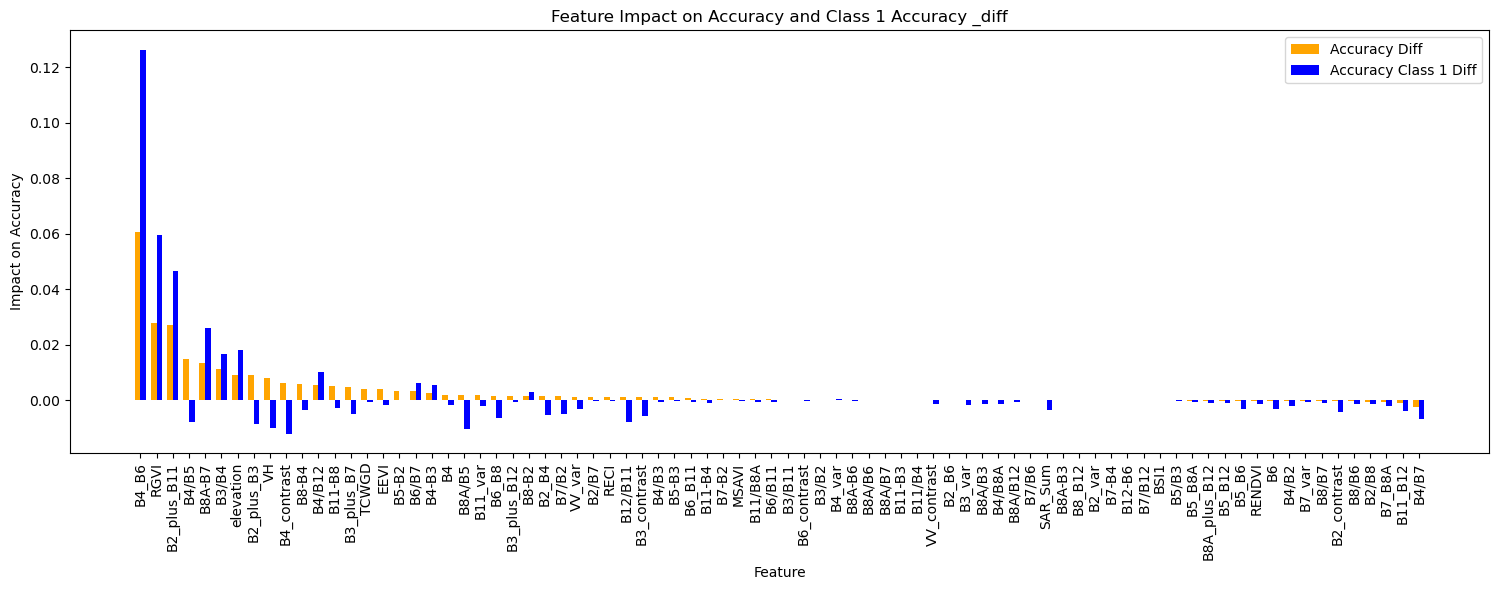

In [36]:
import matplotlib.pyplot as plt
# 提取排序后的特征名称和对应的分类精度
sorted_impact_analysis = sorted(impact_analysis.items(), key=lambda x: initial_accuracy - x[1]['accuracy'], reverse=True)#[:20]
features = [item[0] for item in sorted_impact_analysis]
accuracies = [item[1]['accuracy'] for item in sorted_impact_analysis]
accuracies_class1 = [item[1]['accuracy_class1'] for item in sorted_impact_analysis]

# 计算 impact 和 impact_class1
impact = [initial_accuracy - acc for acc in accuracies]
impact_class1 = [initial_accuracy_class1 - acc for acc in accuracies_class1]

# 绘图
x = np.arange(len(features))  # 特征的索引
width = 0.35  # 条形宽度

fig, ax = plt.subplots(figsize=(15, 6))

# 绘制条形图
bar1 = ax.bar(x - width/2, impact, width, label='Accuracy Diff', color='orange')
bar2 = ax.bar(x + width/2, impact_class1, width, label='Accuracy Class 1 Diff', color='blue')

# 添加标签、标题及图例
ax.set_xlabel('Feature')
ax.set_ylabel('Impact on Accuracy')
ax.set_title('Feature Impact on Accuracy and Class 1 Accuracy _diff')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=90)
ax.legend()

# 调整子图之间的间距
plt.subplots_adjust(bottom=0.8)  # 调整底部间距

plt.tight_layout()
plt.show()

特征 'B4_B6' 删除后的准确率差值: 0.0606, 类别为1的样本分类精度: 0.1263,0.7895
特征 'RGVI' 删除后的准确率差值: 0.0279, 类别为1的样本分类精度: 0.0595,0.8563
特征 'B2_plus_B11' 删除后的准确率差值: 0.0271, 类别为1的样本分类精度: 0.0464,0.8694
特征 'B4/B5' 删除后的准确率差值: 0.0151, 类别为1的样本分类精度: -0.0079,0.9237
特征 'B8A-B7' 删除后的准确率差值: 0.0137, 类别为1的样本分类精度: 0.0261,0.8897
特征 'B3/B4' 删除后的准确率差值: 0.0112, 类别为1的样本分类精度: 0.0166,0.8992
特征 'elevation' 删除后的准确率差值: 0.0093, 类别为1的样本分类精度: 0.0181,0.8977
特征 'B2_plus_B3' 删除后的准确率差值: 0.0090, 类别为1的样本分类精度: -0.0086,0.9244
特征 'VH' 删除后的准确率差值: 0.0080, 类别为1的样本分类精度: -0.0100,0.9258
特征 'B4_contrast' 删除后的准确率差值: 0.0064, 类别为1的样本分类精度: -0.0119,0.9277
特征 'B8-B4' 删除后的准确率差值: 0.0058, 类别为1的样本分类精度: -0.0035,0.9192
特征 'B4/B12' 删除后的准确率差值: 0.0055, 类别为1的样本分类精度: 0.0102,0.9056
特征 'B11-B8' 删除后的准确率差值: 0.0051, 类别为1的样本分类精度: -0.0028,0.9186
特征 'B3_plus_B7' 删除后的准确率差值: 0.0049, 类别为1的样本分类精度: -0.0050,0.9208
特征 'TCWGD' 删除后的准确率差值: 0.0042, 类别为1的样本分类精度: -0.0005,0.9163
特征 'EEVI' 删除后的准确率差值: 0.0040, 类别为1的样本分类精度: -0.0016,0.9173
特征 'B5-B2' 删除后的准确率差值: 0.0035, 类别为1的样本分类精度: 0.0000,0.915

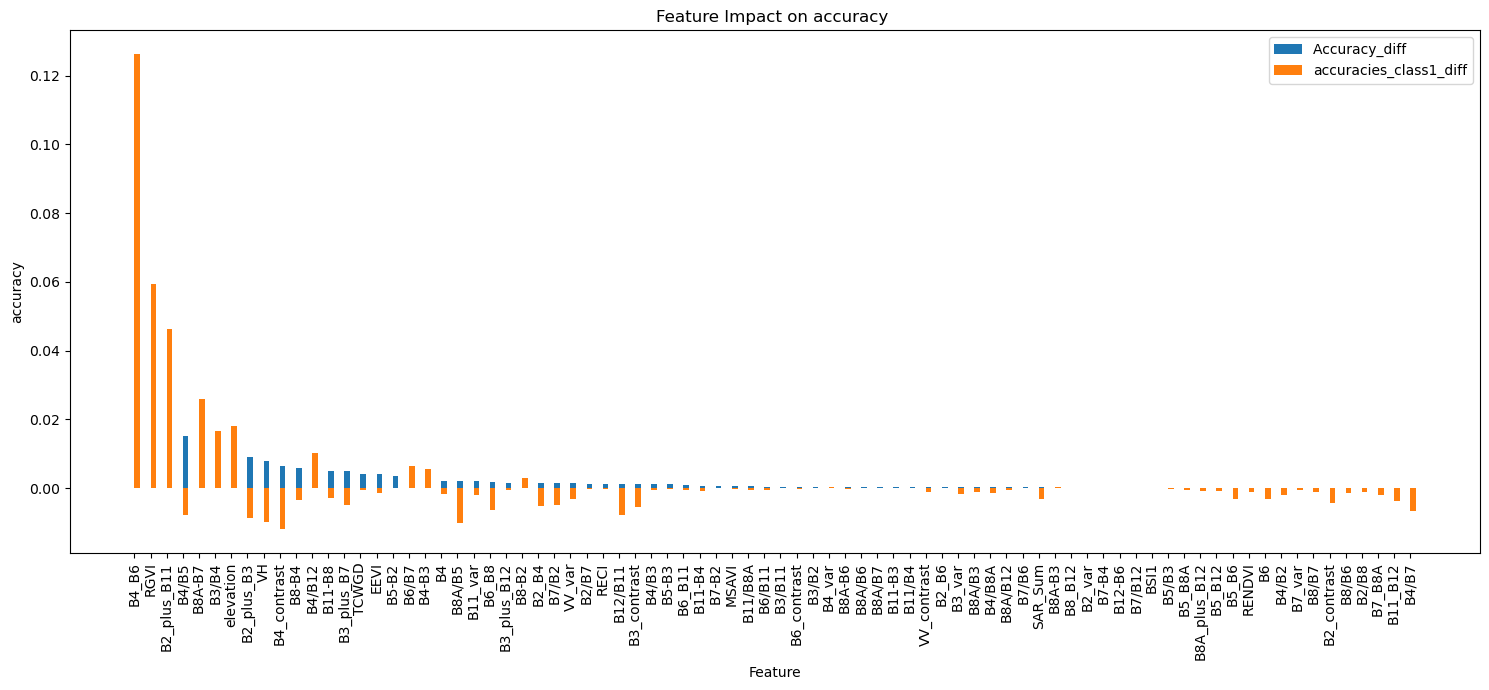

In [37]:
import matplotlib.pyplot as plt
sorted_impact_analysis = sorted(impact_analysis.items(), key=lambda x: initial_accuracy - x[1]['accuracy'], reverse=True)#[:20]
for feature, metrics in sorted_impact_analysis:
    impact = initial_accuracy - metrics['accuracy']
    impact_class1 = initial_accuracy_class1 - metrics['accuracy_class1']
    print(f"特征 '{feature}' 删除后的准确率差值: {impact:.4f}, 类别为1的样本分类精度: {impact_class1:.4f},{metrics['accuracy_class1']:.4f}")

# 提取排序后的特征名称和对应的分类精度
features = [item[0] for item in sorted_impact_analysis]
accuracies = [item[1]['accuracy'] for item in sorted_impact_analysis]
accuracies_class1 = [item[1]['accuracy_class1'] for item in sorted_impact_analysis]

# 绘制条形图
x = range(len(features))
width = 0.35  # 条形宽度


fig, ax = plt.subplots(figsize=(15, 7))
# plt.tight_layout(pad=5.0)
# 调整x的位置，以增加间距
# adjusted_x = [i * (1 + spacing) for i in x]

# fig, ax = plt.subplots(figsize=(20, 10))
# bar1 = ax.bar(x, accuracies, width, label='Accuracy')
bar1 = ax.bar([p + width for p in x], [initial_accuracy - accuracies[i] for i in range(len(accuracies))], width, label='Accuracy_diff ')
bar2 = ax.bar([p + width for p in x], [initial_accuracy_class1 - accuracies_class1[i] for i in range(len(accuracies_class1))], width, label='accuracies_class1_diff')

# bar2 = ax.bar([p + width for p in x], accuracies_class1, width, label='Accuracy Class 1', bottom=initial_accuracy_class1)

# 绘制堆积条形图
# bar1 = ax.bar(x, accuracies, width, label='accuracies', color='b')
# bar2 = ax.bar(x, [initial_accuracy - accuracies[i] for i in range(len(accuracies))], width,
#               bottom=accuracies, label='initial_accuracy', color='lightgray', alpha=0.7)

# 添加特征名称为横坐标标签

ax.set_xlabel('Feature')
ax.set_ylabel('accuracy')
ax.set_title('Feature Impact on accuracy ') #and Class 1 Accuracy
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(features, rotation=90)
# ax.set_xticks(adjusted_x)

# 只显示一半的特征标签qq
# half_features = len(features) // 10
# xtick_labels = [features[i] if i % 2 == 0 else '' for i in range(len(features))]
# print(xtick_labels)
# ax.set_xticklabels(xtick_labels, rotation=45)

# 添加图例--loc='lower right'
ax.legend()

# # 调整子图之间的间距
# plt.subplots_adjust(bottom=0.8)  # 调整底部间距
# 显示图形
# 调整图表布局以增加间距
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

rules = ac.rules
# print(rules)
data = pd.read_csv('data/汇总 - final__.csv')
data = data.dropna()
df = pd.DataFrame(data)

def apply_rules(row):
    for rule in rules:
        rule = str(rule)
        
        conditions, outcome = rule.split(' → ')
        conditions = conditions.strip()
        conditions = conditions.replace('˄', 'and').replace('≤', '<=')
        if conditions == "":  # 处理最后的空规则
            return int(outcome[1])  # 取结果中的0或1
        # 检查条件是否满足
        if eval(conditions, {}, row.to_dict()):  # 使用row的字典表示形式作为eval的上下文
            return int(outcome[1])  # 取结果中的0或1
    return 0  # 如果没有任何规则符合，则默认为0

# 应用规则到数据集上，得到预测的分类结果
data['predicted'] = data.apply(apply_rules, axis=1)

# 计算整体分类精度
accuracy = (data['type'] == data['predicted']).mean()
print(f"整体分类精度为: {accuracy:.4f}")


整体分类精度为: 0.9542


                                                 rule  label  \
0   (B11-B8 > -1458.500) and (B12/B11 <= 0.881) an...      1   
1   (B5_B11 <= 0.006) and (B8A-B7 > 103.500) and (...      0   
2   (B2_plus_B11 > 805.000) and (B4-B3 <= -69.250)...      0   
3   (B11_var > 2.950) and (B3_B8 > 0.609) and (B3_...      0   
4   (B2_plus_B11 > 816.500) and (B3_corr <= 0.706)...      0   
5   (B4_corr <= 0.843) and (B5/B2 <= 1.655) and (B...      0   
6   (B2_contrast <= 1247.080) and (B2_plus_B3 <= 1...      1   
7   (B11-B4 > -1264.000) and (B12/B11 <= 0.703) an...      1   
8   (B2_plus_B11 > 805.000) and (B4_B6 > 0.166) an...      0   
9   (B11_var <= 3620.365) and (B3_plus_B7 > 2164.5...      1   
10  (B11-B3 <= 966.500) and (B11-B8 > -1350.000) a...      1   
11  (B11-B8 > -1458.500) and (B11_B12 > 0.092) and...      1   
12  (B2/B11 > 7.153) and (B3/B4 <= 0.840) and (B5/...      0   
13  (B2_var <= 208775.602) and (B4-B2 <= 40.500) a...      0   
14  (B3/B4 > 1.498) and (B4_corr <= 0.52

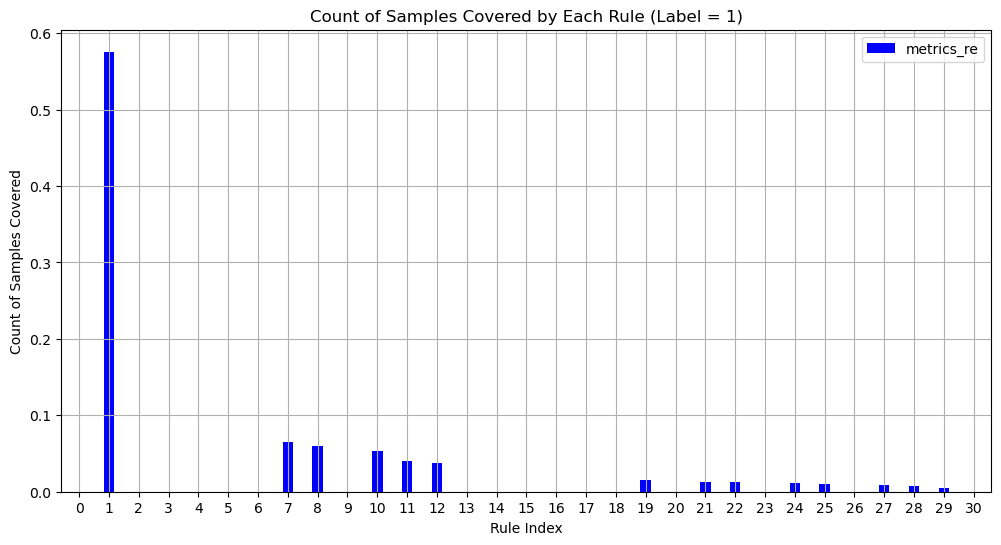

In [49]:
# 合并两个 DataFrame，保留 count 列
merged = pd.merge(metrics_back[['rule', 'label', 'class_ratio', 'count']], 
                  metrics_re[['rule', 'label', 'class_ratio', 'count']], 
                  on=['rule', 'label'], 
                  suffixes=('_back', '_re'))

# 计算 class1_ratio 的差值
merged['class_ratio_diff'] = abs(merged['class_ratio_back']) - abs(merged['class_ratio_re'])
merged['count_diff'] = abs(merged['count_back']) - abs(merged['count_re'])

# 选择所需的列
result = merged[['rule', 'label', 'class_ratio_diff', 'count_diff']]

# 保留 class1_ratio_diff 小于 0.05 的行
filtered_result = result[result['class_ratio_diff'] < 0.5]

print(filtered_result)

# Filter the metrics for rules where the label is 1
metrics_re_label_1 = metrics_re[metrics_re['label'] == 1]
print(metrics_re_label_1)
metrics_back_label_1 = metrics_back[metrics_back['label'] == 1]


# 绘制图形
# Plot the count of samples covered by each rule as a bar chart
# Plot the count of samples covered by each rule as a bar chart
bar_width = 0.35
print(metrics_re_label_1['index'])
index_re = metrics_re_label_1['index']
index_back = metrics_back_label_1['index']

plt.figure(figsize=(12, 6))
plt.bar(index_re, metrics_re_label_1['class1_ratio'], bar_width, label='metrics_re', color='b')
# plt.bar(index_back + bar_width, metrics_back_label_1['class1_ratio'], bar_width, label='metrics_back', color='r')

plt.xlabel('Rule Index')
plt.ylabel('Count of Samples Covered')
plt.title('Count of Samples Covered by Each Rule (Label = 1)')
plt.xticks(np.arange(len(rules)))
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
import sys
sys.exit()